In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-liver-cancer-from-and-clinical-features/synthetic_liver_cancer_dataset.csv


<html>
<head>
<meta charset="UTF-8">
<title>Liver Cancer Classification - Detailed Roadmap & Motivation</title>
<style>
  body { background-color: green; color: #E0E0E0; font-family: Arial, sans-serif; line-height: 1.7; }
  h1, h2 { color: #FF9800; }
  p, ul { font-size: 16px; }
  .section { margin-bottom: 28px; padding: 18px; border: 1px solid #333; border-radius: 8px; background-color: #1E1E1E; }
  .highlight { color: #80CBC4; font-weight: bold; }
  .emphasis { color: #F44336; font-style: italic; }
</style>
</head>
<body>

<h1>🩺 Liver Cancer Classification Project</h1>

<div class="section">
  <h2>🎯 Motivation</h2>
  <p>
    Liver cancer, and in particular <span class="highlight">Hepatocellular Carcinoma (HCC)</span>, 
    is among the most deadly forms of cancer due to late detection and aggressive progression. 
    Patients often display minimal or non‑specific symptoms until the disease has reached an advanced stage, 
    where treatment options are limited and survival rates drop sharply.
  </p>
  <p>
    Early identification of high‑risk individuals can be life‑saving. Laboratory tests, demographic data, 
    and clinical indicators already exist in standard hospital workflows — but humans alone cannot 
    efficiently detect subtle statistical patterns hidden across thousands of patient cases. 
    This is where <span class="highlight">machine learning</span> comes in: it allows us to 
    transform patient records into predictive intelligence.
  </p>
  <ul>
    <li><span class="highlight">Health Impact:</span> Earlier diagnosis → earlier treatment → increased survival rate.</li>
    <li><span class="highlight">Economic Impact:</span> More efficient use of costly diagnostic imaging and specialist consultations.</li>
    <li><span class="highlight">Social Impact:</span> Improved patient confidence in proactive health monitoring systems.</li>
    <li><span class="highlight">Scientific Impact:</span> Contributing to the growing body of research on ML in oncology.</li>
  </ul>
</div>

<div class="section">
  <h2>📜 What We Are Going to Do</h2>
  <p>
    This is not just a data exercise — it’s a step‑by‑step pipeline designed to produce a 
    clinically relevant classification model for liver cancer detection:
  </p>
  <ul>
    <li>
      <span class="highlight">Data Acquisition & Exploration:</span> Load the dataset from Kaggle, inspect its shape, 
      understand the features (such as <em>Age, Gender, AFP levels, ALT, AST</em>) and the target label 
      indicating cancer presence.
    </li>
    <li>
      <span class="highlight">Exploratory Data Analysis (EDA):</span> Use statistical summaries and
      visualizations (histograms, correlation heatmaps, boxplots) to uncover trends, such as how specific 
      lab results differ between cancer and non‑cancer groups.
    </li>
    <li>
      <span class="highlight">Data Cleaning & Preprocessing:</span> Handle missing values, encode categorical 
      variables into numeric form, normalize numerical attributes, and address any class imbalance problem 
      through techniques like SMOTE or class weighting.
    </li>
    <li>
      <span class="highlight">Feature Engineering:</span> Identify derived metrics (ratios, biomarker combinations) that 
      may improve predictive power, guided by medical literature.
    </li>
    <li>
      <span class="highlight">Model Selection:</span> Train multiple classification algorithms:
      Logistic Regression (for interpretability), Random Forest (for non‑linear relationships), 
      XGBoost/LightGBM (for speed and accuracy), and possibly deep learning models if feature volume justifies.
    </li>
    <li>
      <span class="highlight">Validation & Evaluation:</span> Use stratified train/test splits and 
      cross‑validation to ensure reliability. Evaluate using ROC‑AUC, precision, recall, F1‑score, and 
      confusion matrix — metrics that matter when false negatives could mean missed diagnosis.
    </li>
    <li>
      <span class="highlight">Model Interpretation:</span> Apply SHAP or LIME to explain predictions, 
      ensuring medical professionals can understand why the model flags a patient as high‑risk.
    </li>
    <li>
      <span class="highlight">Deployment Consideration:</span> Package the winning model into a form that 
      could be integrated into a hospital’s electronic health record (EHR) system or diagnostic workflow.
    </li>
  </ul>
</div>

<div class="section">
  <h2>🌍 Broader Impacts</h2>
  <p>
    If implemented successfully, this model could drastically change the healthcare landscape:
  </p>
  <ul>
    <li>
      <span class="highlight">Patient Outcomes:</span> Shift from reactive treatment after symptom onset 
      to proactive screening while patients are still in asymptomatic stages.
    </li>
    <li>
      <span class="highlight">Healthcare Efficiency:</span> Reduce unnecessary testing for low‑risk individuals, 
      focusing resources on those most likely to benefit from early interventions.
    </li>
    <li>
      <span class="highlight">Policy Support:</span> Evidence‑based tool for public health agencies to design 
      targeted screening programs in high‑risk communities.
    </li>
    <li>
      <span class="highlight">Global Reach:</span> Scalable to hospitals worldwide, especially in regions lacking 
      access to advanced imaging but possessing basic lab testing facilities.
    </li>
  </ul>
  <p>
    By extracting meaningful insights from simple medical data, this project bridges the gap between 
    traditional healthcare and modern AI, contributing toward a future where <span class="highlight">preventive medicine</span> 
    is powered by intelligent systems.
  </p>
</div>

</body>
</html>


<body style="background-color:#121212; font-family: Arial, sans-serif; color:#f0f0f0; margin: 0; padding: 0;">

<div style="max-width: 1000px; margin: auto; padding: 20px; background-color: #1e1e1e; box-shadow: 0px 4px 6px rgba(0,0,0,0.3); border-radius: 8px;">

<h1 style="color: #bb86fc; text-align: center; font-size: 32px; padding-bottom: 20px;">Understanding the Data</h1>

<p style="font-size: 18px; line-height: 1.6; text-align: justify; padding-bottom: 20px;">
            In this section, we'll take an initial look at the dataset to better understand its structure and the features it contains.
            The key steps for understanding the data include loading the data, checking for missing values, examining data types, and visualizing the data.
        </p>

<div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #03dac5;">
            <h2 style="color: #03dac5; font-size: 24px;">1. Loading the Data</h2>
            <p style="font-size: 16px;">We start by loading the dataset using the <code style="background-color: #2e2e2e; padding: 2px 5px; font-family: monospace; color: #fff;">pandas</code> library, which is commonly used for data manipulation in Python. We can load the dataset directly into a <code style="background-color: #2e2e2e; padding: 2px 5px; font-family: monospace; color: #fff;">pandas DataFrame</code> for easier analysis.</p>
            <pre style="background-color: #212121; border: 1px solid #444; padding: 10px; font-size: 14px; font-family: monospace; color: #e0e0e0;">
import pandas as pd
df = pd.read_csv('path_to_your_dataset.csv')
df.head()
            </pre>
        </div>

        
 <div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #ff4081;">
            <h2 style="color: #ff4081; font-size: 24px;">2. Checking for Missing Values</h2>
            <p style="font-size: 16px;">We check for any missing values in the dataset. It's important to handle missing data before moving forward with analysis or model building.</p>
            <pre style="background-color: #212121; border: 1px solid #444; padding: 10px; font-size: 14px; font-family: monospace; color: #e0e0e0;">
df.isnull().sum()
            </pre>
        </div>

<div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #ffeb3b;">
            <h2 style="color: #ffeb3b; font-size: 24px;">3. Examining Data Types</h2>
            <p style="font-size: 16px;">It's essential to understand the data types of each feature. Categorical variables need encoding, and numerical features may need scaling.</p>
            <pre style="background-color: #212121; border: 1px solid #444; padding: 10px; font-size: 14px; font-family: monospace; color: #e0e0e0;">
df.info()
            </pre>
        </div>

<div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #8bc34a;">
            <h2 style="color: #8bc34a; font-size: 24px;">4. Summary Statistics</h2>
            <p style="font-size: 16px;">We use summary statistics to understand key metrics such as mean, standard deviation, and range for each numerical feature.</p>
            <pre style="background-color: #212121; border: 1px solid #444; padding: 10px; font-size: 14px; font-family: monospace; color: #e0e0e0;">
df.describe()
            </pre>
        </div>

<div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #d32f2f;">
            <h2 style="color: #d32f2f; font-size: 24px;">5. Visualizing the Data</h2>
            <p style="font-size: 16px;">Visualization is a powerful tool to understand data distributions and relationships between features. We will use plots such as histograms and correlation heatmaps.</p>
            <pre style="background-color: #212121; border: 1px solid #444; padding: 10px; font-size: 14px; font-family: monospace; color: #e0e0e0;">
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], kde=True, color='blue')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
            </pre>
        </div>

 <h2 style="color: #bb86fc; text-align: center; font-size: 26px; padding-top: 30px;">Conclusion</h2>
        <p style="font-size: 18px; line-height: 1.6; text-align: justify; padding-bottom: 20px;">
            By following these steps, we can gain a clear understanding of the dataset’s structure and its features. This allows us to take the necessary actions, such as handling missing values, encoding categorical variables, and visualizing distributions, which are important steps before applying machine learning models.
        </p>

</div>

</body>


In [2]:
import pandas as pd

# Load the dataset
url = "/kaggle/input/predict-liver-cancer-from-and-clinical-features/synthetic_liver_cancer_dataset.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()


,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Get data types and basic info
print("\nData types and info:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Missing values:
 age                        0
gender                     0
bmi                        0
alcohol_consumption        0
smoking_status             0
hepatitis_b                0
hepatitis_c                0
liver_function_score       0
alpha_fetoprotein_level    0
cirrhosis_history          0
family_history_cancer      0
physical_activity_level    0
diabetes                   0
liver_cancer               0
dtype: int64

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   alcohol_consumption      5000 non-null   object 
 4   smoking_status           5000 non-null   object 
 5   hepatitis_b              5000 non-null   int64  
 6 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


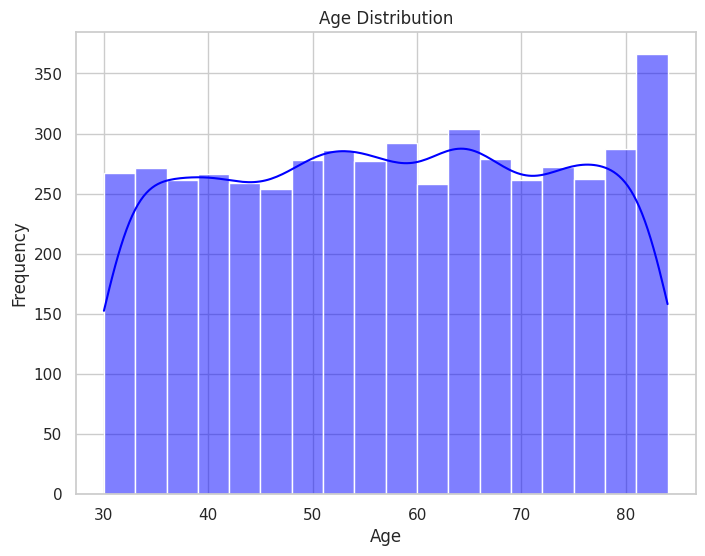

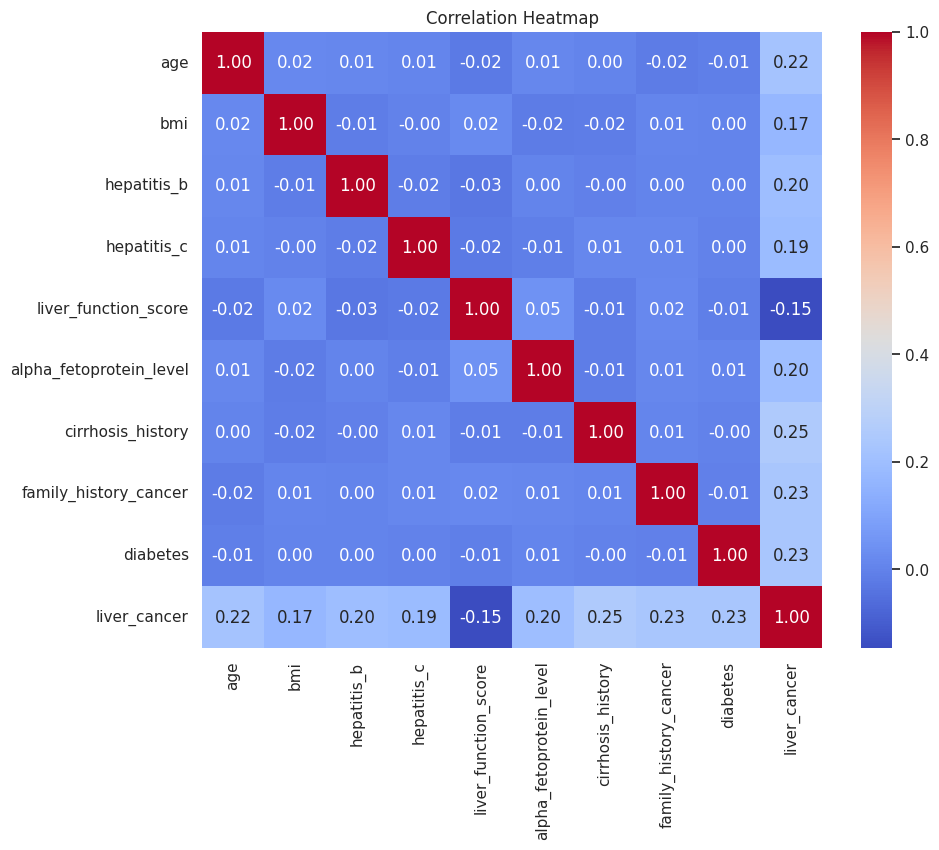

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



<body style="background-color:#121212; font-family: Arial, sans-serif; color:#f0f0f0; margin: 0; padding: 0;">

<div style="max-width: 1000px; margin: auto; padding: 20px; background-color: #1e1e1e; box-shadow: 0px 4px 6px rgba(0,0,0,0.3); border-radius: 8px;">

<h1 style="color: #bb86fc; text-align: center; font-size: 32px; padding-bottom: 20px;">Understanding the Data</h1>

<p style="font-size: 18px; line-height: 1.6; text-align: justify; padding-bottom: 20px;">
            In this section, we’ll explore the dataset, focusing on its structure, missing values, data types, and summary statistics.
            This helps us understand the features in the dataset and prepare it for further analysis and modeling.
        </p>

        
<div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #03dac5;">
            <h2 style="color: #03dac5; font-size: 24px;">1. Data Overview</h2>
            <p style="font-size: 16px;">The dataset contains 5000 entries with the following 14 columns:</p>
            <ul style="font-size: 16px; padding-left: 20px;">
                <li><strong>age</strong>: Age of the patient (integer)</li>
                <li><strong>gender</strong>: Gender of the patient (categorical: 'Male', 'Female')</li>
                <li><strong>bmi</strong>: Body Mass Index (float)</li>
                <li><strong>alcohol_consumption</strong>: Alcohol consumption status (categorical: 'Yes', 'No')</li>
                <li><strong>smoking_status</strong>: Smoking status (categorical: 'Smoker', 'Non-smoker')</li>
                <li><strong>hepatitis_b</strong>: Hepatitis B status (binary: 0 or 1)</li>
                <li><strong>hepatitis_c</strong>: Hepatitis C status (binary: 0 or 1)</li>
                <li><strong>liver_function_score</strong>: Liver function score (float)</li>
                <li><strong>alpha_fetoprotein_level</strong>: Alpha-fetoprotein level (float)</li>
                <li><strong>cirrhosis_history</strong>: Cirrhosis history (binary: 0 or 1)</li>
                <li><strong>family_history_cancer</strong>: Family history of cancer (binary: 0 or 1)</li>
                <li><strong>physical_activity_level</strong>: Physical activity level (categorical: 'Active', 'Inactive')</li>
                <li><strong>diabetes</strong>: Diabetes status (binary: 0 or 1)</li>
                <li><strong>liver_cancer</strong>: Liver cancer diagnosis (binary: 0 or 1)</li>
            </ul>
        </div>

        
<div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #ff4081;">
            <h2 style="color: #ff4081; font-size: 24px;">2. Missing Values</h2>
            <p style="font-size: 16px;">The dataset contains no missing values, which is a good sign for our analysis.</p>
            <pre style="background-color: #212121; border: 1px solid #444; padding: 10px; font-size: 14px; font-family: monospace; color: #e0e0e0;">
age                        0
gender                     0
bmi                        0
alcohol_consumption        0
smoking_status             0
hepatitis_b                0
hepatitis_c                0
liver_function_score       0
alpha_fetoprotein_level    0
cirrhosis_history          0
family_history_cancer      0
physical_activity_level    0
diabetes                   0
liver_cancer               0
            </pre>
        </div>

<div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #ffeb3b;">
            <h2 style="color: #ffeb3b; font-size: 24px;">3. Data Types and Information</h2>
            <p style="font-size: 16px;">The dataset has the following data types:</p>
            <ul style="font-size: 16px; padding-left: 20px;">
                <li><strong>int64</strong>: 7 columns (age, hepatitis_b, hepatitis_c, cirrhosis_history, family_history_cancer, diabetes, liver_cancer)</li>
                <li><strong>float64</strong>: 3 columns (bmi, liver_function_score, alpha_fetoprotein_level)</li>
                <li><strong>object</strong>: 4 columns (gender, alcohol_consumption, smoking_status, physical_activity_level)</li>
            </ul>
            <p style="font-size: 16px;">Here’s a summary of the dataset’s structure:</p>
            <pre style="background-color: #212121; border: 1px solid #444; padding: 10px; font-size: 14px; font-family: monospace; color: #e0e0e0;">
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   alcohol_consumption      5000 non-null   object 
 4   smoking_status           5000 non-null   object 
 5   hepatitis_b              5000 non-null   int64  
 6   hepatitis_c              5000 non-null   int64  
 7   liver_function_score     5000 non-null   float64
 8   alpha_fetoprotein_level  5000 non-null   float64
 9   cirrhosis_history        5000 non-null   int64  
 10  family_history_cancer    5000 non-null   int64  
 11  physical_activity_level  5000 non-null   object 
 12  diabetes                 5000 non-null   int64  
 13  liver_cancer             5000 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 547.0+ KB
            </pre>
        </div>

 <div style="background-color: #333333; padding: 15px; margin-bottom: 20px; border-left: 5px solid #8bc34a;">
            <h2 style="color: #8bc34a; font-size: 24px;">4. Summary Statistics</h2>
            <p style="font-size: 16px;">Here are the summary statistics of the numerical columns:</p>
            <pre style="background-color: #212121; border: 1px solid #444; padding: 10px; font-size: 14px; font-family: monospace; color: #e0e0e0;">
               age         bmi  hepatitis_b  hepatitis_c  liver_function_score  alpha_fetoprotein_level  cirrhosis_history  family_history_cancer  diabetes  liver_cancer
count  5000.000000  5000.00000   5000.00000  5000.000000           5000.000000              5000.000000        5000.000000             5000.000000  5000.000000   5000.000000
mean     57.222800    25.90464      0.15120     0.095800              65.203900                15.109424           0.301600            0.241400     0.199200      0.217800
std      15.799224     5.10520      0.35828     0.294346              14.875477                15.196809           0.458998            0.427975     0.399439      0.412792
min      30.000000     8.10000      0.00000     0.000000               5.500000                 0.000000           0.000000            0.000000     0.000000      0.000000
25%      44.000000    22.50000      0.00000     0.000000              54.800000                 4.357500           0.000000            0.000000     0.000000      0.000000
50%      57.000000    25.90000      0.00000     0.000000              65.200000                10.340000           0.000000            0.000000     0.000000      0.000000
75%      71.000000    29.30000      0.00000     0.000000              75.200000                21.010000           1.000000            0.000000     0.000000      0.000000
max      84.000000    43.70000      1.00000     1.000000             115.700000               136.800000           1.000000            1.000000     1.000000      1.000000
            </pre>
        </div>



       
<h2 style="color: #bb86fc; text-align: center; font-size: 26px; padding-top: 30px;">Conclusion</h2>
        <p style="font-size: 18px; line-height: 1.6; text-align: justify; padding-bottom: 20px;">
            Based on the initial exploration of the data, we can proceed to data preprocessing, handling categorical features, and identifying potential outliers before moving forward with modeling.
        </p>
</div>

</body>
